# Project 1 Final Deliverable

By Jonathan Montague and Becca Suchower

#### Question: Currently, polar bears are a vulnerable species, meaning that they are in danger of becoming an endangered species.  The decline in polar bear population has been linked to climate change, due to the melting of sea ice, which is a crucial part of polar bear habitat.  If global temperatures continue to rise, when will polar bears become extinct?  

# Initialization of Jupyter

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_csv

# Polar Bear Population Data

We used the Official PBSG Polar Bear Population Estimates graph for our population data.  It contained seven data points, ranging from 1980-2013.

Source: https://polarbearscience.files.wordpress.com/2014/02/crockford_polarbearscience-1981-2013_fig11.jpg

In [16]:
# polar bear population
pop = [22000, 25000, 24500, 23000, 22000, 20000, 18000];

# year at which population data was collected
year = [1980, 1992, 1997, 2001, 2005, 2009, 2013];

# creates a DataFrame table with the polar bear population and the year the population was estimated
pPopTable = DataFrame(data=pop, index=year)

pPopTable.columns = ['Population']

pPopTable

,Population
1980,22000
1992,25000
1997,24500
2001,23000
2005,22000
2009,20000
2013,18000


The graph of population data vs year is shown below.

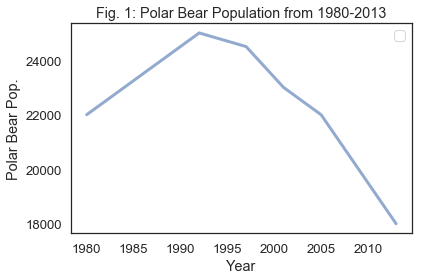

In [39]:
plot(year, pop)
decorate(xlabel='Year', 
             ylabel='Polar Bear Pop.',
        title='Fig. 1: Polar Bear Population from 1980-2013')

# Temperature Data

The temperature data illustrates the average global temperature anomaly from 1880 to 2017 in degrees Celsius.  The anomaly values are relative to the 1951-1980 average temperatures.  

Source: https://climate.nasa.gov/vital-signs/global-temperature/

In [19]:
# years for which average temperature anomalies were recorded
aYear = linrange(1880,2017,1,endpoint=True)

# average temperature anomalies from 1880 to 2017
aTemp = [-0.19, -0.1, -0.1, -0.19, -0.28, -0.31, -0.32, -0.35, -0.18, -0.11, -0.37, -0.24, -0.27, -0.32, -0.32, 
         -0.22, -0.11, -0.12, -0.28, -0.18, -0.09, -0.15, -0.3, -0.39, -0.49, -0.28, -0.23, -0.4, -0.44, -0.48,
         -0.44, -0.43, -0.36, -0.35, -0.16, -0.12, -0.33, -0.43, -0.28, -0.27, -0.25, -0.17, -0.27, -0.24, -0.25,
         -0.21, -0.09, -0.2, -0.19, -0.35, -0.15, -0.1, -0.17, -0.3, -0.14, -0.21, -0.16, -0.04, -0.03, -0.03, 0.11,
         0.18, 0.05, 0.07, 0.21, 0.09, -0.07, -0.04, -0.11, -0.11, -0.19, -0.07, 0.01, 0.07, -0.15, -0.14, -0.2, 0.04,
         0.07, 0.03, -0.02, 0.06, 0.04, 0.07, -0.2, -0.1, -0.05, -0.02, -0.07, 0.07, 0.03, -0.09, 0.01, 0.16, -0.08, 
         -0.02, -0.11, 0.17, 0.06, 0.16, 0.27, 0.33, 0.13, 0.31,0.16, 0.12, 0.18, 0.33, 0.41, 0.28, 0.44, 0.41, 0.22,
         0.24, 0.31, 0.44, 0.33, 0.47, 0.62, 0.4, 0.4, 0.54, 0.62, 0.61, 0.53, 0.67, 0.62, 0.64, 0.52, 0.63, 0.7, 0.57,
         0.61, 0.64, 0.73, 0.86, 0.99, 0.9];


Here is the plot comparing the actual temperature anomaly data and the temperature best fit curve. We found the best fit curve of the data using MATLAB, and generated the function.  We set the best fit curve as a TimeSeries object in a for loop to store the results.

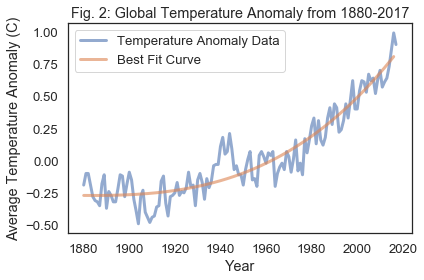

In [38]:
plot(aYear, aTemp, label='Temperature Anomaly Data');

curve = TimeSeries()
for t in linrange (1880, 2017):
        curve[t] = (3.3119 * 10 ** -7) * (t ** 3) - 0.0018537 * (t ** 2) + 3.4581 * t - 2150.43
        
plot(curve, label='Best Fit Curve')

decorate(xlabel='Year', 
             ylabel='Average Temperature Anomaly (C)',
        title='Fig. 2: Global Temperature Anomaly from 1880-2017')

Here we created a function to find the temperature anomaly of any year based on our best fit curve.

In [26]:
# defines a function for the best fit curve for temperature based on year
def find_temp(t):
    temp = (3.3119 * 10 ** -7) * (t ** 3) - 0.0018537 * (t ** 2) + 3.4581 * t - 2150.45
    return temp

# Modeling Population Change

Our first step is to create the state and system objects to update values throughout the simulation.

In [27]:
# creates a state object with polar bear population and year
state = State(pPop = get_first_value(pPopTable),
             pYear = get_first_label(pPopTable))

,values
pPop,[22000]
pYear,1980


Below are our system parameters. The birth rate and death rate parameters were hand picked to best fit our model to the earlier polar bear population data.  The year 2150 was chosen so we could see patterns emerge in the future.

In [28]:
# system parameters

birth_rate = .027
death_rate = .08
pYearEnd = 2150

system = System(birth_rate = birth_rate, 
                death_rate = death_rate,
               pYearEnd = pYearEnd)

,values
birth_rate,0.027
death_rate,0.080
pYearEnd,2150.000


The number of births and deaths each year was assumed to be proportional to the population of the current year (the greater the population, the more births and deaths there are that year).  The number of deaths each year was also assumed to be proportional to the temperature anomaly (the greater the temperature anomaly, the greater number of deaths).  Every time we update the population, we add the number of births and subtract the number of deaths.

In [30]:
def update_func (pPop, t, system):
    death_rate_temp = system.death_rate * find_temp(t)
    births = system.birth_rate * pPop
    deaths = death_rate_temp * pPop
    return pPop + births - deaths

# Run Simulation

We created a simulation that computes the population of polar bears for each year.  The population is computed by our update function above.  

In [31]:
def run_simulation(system, update_func):
    results = TimeSeries()
    results[state.pYear] = state.pPop

    for t in linrange (state.pYear, system.pYearEnd):
        results[t+1] = update_func(results[t], t, system)
        
    return results

The results of this simulation are recorded and plotted against the original population data:

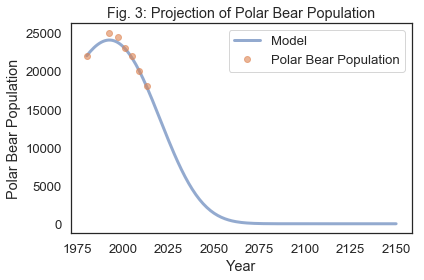

In [43]:
results = run_simulation(system, update_func)

plot(results, label='Model')
plot(year, pop, 'o', label='Polar Bear Population' )

decorate(xlabel='Year', 
             ylabel='Polar Bear Population',
        title='Fig. 3: Projection of Polar Bear Population')

# Results and Interpretation


Figure 3 shows the original polar bear population data compared to the results from our simulation.  Figure 3 also shows the projected polar bear population from 2018 to 2150 based on our model. 

The model fits the data well, except for the 1992 and 1997 data points, which appear to be above the curve of the model.  However, the other five data points fit onto the curve.  The general shape of the graph is a slight increase in earlier years, before decreasing to a horizontal asymptote of zero.

As indicated by Figure 3, polar bear population will continue to decline after 2017.  Based on our model's projection, polar bears will become extinct somewhere around the year 2060.  It appears that climate change is a probable factor in polar bear poplation, based on the model's close fit of the data.

Our current model assumes that temperature will continue to increase for the forseeable future.  It also assumes that temperature and population size are the only factors that contribute to population growth and decline, when in reality there are several other factors that affect polar bear population.  

Our polar bear population data is limited to only a few data points and years, and it is an estimate of the total polar bear population. This makes it challenging to judge whether our model accurately represents polar bear population.  Since there are limited studies on polar bear population, it is unclear on whether polar bear subpopulations in different locations are affected in the same way our model assumes.

# Further Investigation

In our previous model, we assumed that temperature would continue to increase at the rate projected by the best fit curve.  In this investigation, we wanted to test how other temperature curves would affect the population model.  We created three additional temperature curves to test possible temperature trends in the future.  All four curves are represented in the Figure 4 plot.

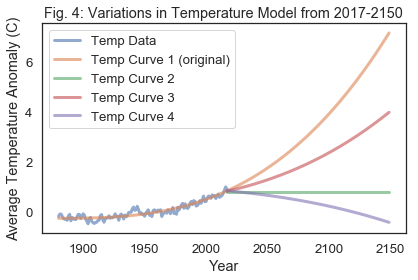

In [45]:
# original temperature anomaly data
plot(aYear, aTemp, label='Temp Data');

# original temperature best fit curve from 1880 to 2017
curve1 = TimeSeries()
for t in linrange (1880, system.pYearEnd):
    curve1[t] = (3.3119 * 10 ** -7) * (t ** 3) - 0.0018537 * (t ** 2) + 3.4581 * t - 2150.43    
plot(curve1, '-', label='Temp Curve 1 (original)')

# curve that assumes temperature will stay constant after 2017
curve2 = TimeSeries()
for t in linrange (2017, system.pYearEnd):
    curve2[t] = 0.8
plot(curve2, '-', label='Temp Curve 2')

# curve that assumes moderate temp increase after 2017
curve3 = TimeSeries()
for t in linrange (2017, system.pYearEnd):
    curve3[t] = ((3.3119 * 10 ** -7) * (t ** 3) - 0.0018537 * (t ** 2) + 3.4581 * t - 2150.43)/2 + 0.4
plot(curve3, '-', label='Temp Curve 3')

# curve that assumes temp decrease after 2017
curve4 = TimeSeries()
for t in linrange (2017, system.pYearEnd):
    curve4[t] = -((3.3119 * 10 ** -7) * (t ** 3) - 0.0018537 * (t ** 2) + 3.4581 * t - 2150.43)/5 + 1
plot(curve4, '-', label='Temp Curve 4')
   
    
decorate(xlabel='Year', 
             ylabel='Average Temperature Anomaly (C)',
        title='Fig. 4: Variations in Temperature Model from 2017-2150')

Figure 4 displays the four different temperature curves.  We assume that all data until 2017 is valid, so all four curves begin to differentiate after 2017.  Temp Curve 1 is our original best fit curve for the temperature anomaly data.  Temp Curve 2 assumes that temperature will neither increase nor decrease after 2017.  Temp Curve 3 assumes that temperature will continue to increase after 2017, but at a slower rate than Temp Curve 1.  Temp Curve 4 assumes that temperature will decrease after 2017.

We defined functions to evaluate the temperature for each year based on our different curves.

In [46]:
def find_temp2(t):
    temp = curve2[t]
    return temp

def find_temp3(t):
    temp = curve3[t]
    return temp

def find_temp4(t):
    temp = curve4[t]
    return temp

We created new update functions to model population growth based off of each new curve.  Before 2017, all models are the same, but diverge based on each temperature curve after 2017.

In [47]:
def update_func2 (pPop, t, system):
    if t<2017:
        death_rate_temp = system.death_rate * find_temp(t)
    else:
        death_rate_temp = system.death_rate * find_temp2(t)
    births = system.birth_rate * pPop
    deaths = death_rate_temp * pPop
    return pPop + births - deaths

def update_func3 (pPop, t, system):
    if t<2017:
        death_rate_temp = system.death_rate * find_temp(t)
    else:
        death_rate_temp = system.death_rate * find_temp3(t)
    births = system.birth_rate * pPop
    deaths = death_rate_temp * pPop
    return pPop + births - deaths

def update_func4 (pPop, t, system):
    if t<2017:
        death_rate_temp = system.death_rate * find_temp(t)
    else:
        death_rate_temp = system.death_rate * find_temp4(t)
    births = system.birth_rate * pPop
    deaths = death_rate_temp * pPop
    return pPop + births - deaths

We then plotted the population models that each temperature curve produced with the population data.

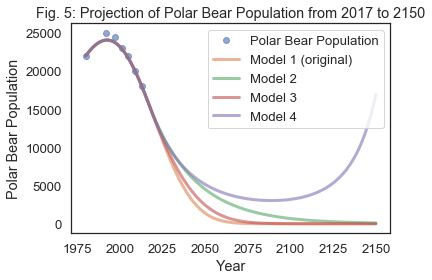

In [52]:
plot(year, pop, 'o', label='Polar Bear Population' )

results = run_simulation(system, update_func)
plot(results, label ='Model 1 (original)')

results = run_simulation(system, update_func2)
plot(results, label ='Model 2')

results = run_simulation(system, update_func3)
plot(results, label ='Model 3')

results = run_simulation(system, update_func4)
plot(results, label ='Model 4')


decorate(xlabel='Year', 
             ylabel='Polar Bear Population',
        title='Fig. 5: Projection of Polar Bear Population from 2017 to 2150')


Based on Figure 5, models where temperature continues to increase causes polar bear population to decrease and eventually become extinct (Models 1 and 3).  Our model also shows that the current temperature is not sustainable for polar bears in the future, as a constant temperature causes polar bear population to eventually become extinct (Model 2).  If temperature decreases in the future, polar bear population will decrease and then recover based on our model (Model 4).  

Based on our graph, the only way to prevent polar bear extinction is to decrease the global temperature anomaly.

One fault of this model is that polar bear populations will infinitely increase as temperature continues to decrease.  The temperature decrease benefits polar bears by increasing sea ice, but eventually there would be a temperature where polar bears would be unable to survive.  

In the future, we could investigate the effects of adding a population carrying capacity in order to better simulate real life populations. We could also look at adjusting the birth and death rates to better fit other population data points, and create another possible population model curve.  We would also like to furthur investigate the case where temperature starts to decrease, in order to see the effects on population if temperature began to decrease at a later year.  Finally, we could investigate which temperature makes polar bear population sustainable and stable.